# loading the libraries

In [1]:
!pip install indoxGen_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!wget https://raw.githubusercontent.com/osllmai/inDox/refs/heads/master/cookbook/indoxGen/data/Adult.csv

--2025-03-23 03:31:44--  https://raw.githubusercontent.com/osllmai/inDox/refs/heads/master/cookbook/indoxGen/data/Adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1814622 (1.7M) [text/plain]
Saving to: ‘Adult.csv’

Adult.csv           100%[===================>]   1.73M  --.-KB/s    in 0.03s   

2025-03-23 03:31:44 (49.7 MB/s) - ‘Adult.csv’ saved [1814622/1814622]



In [4]:
import pandas as pd
data = pd.read_csv("./Adult.csv")

data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


In [6]:
# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]

In [7]:
from indoxGen_torch.GAN.gan import TabularGANTrainer, TabularGANConfig
from indoxGen_torch.GAN.evaluation import train_and_evaluate_classifier, evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, plot_distributions, evaluate_data_drift

In [8]:
# Set up the configuration
config = TabularGANConfig(
    input_dim=200,  # Noise dimension
    generator_layers=[128, 256, 512],
    discriminator_layers=[512, 256, 128],
    learning_rate=2e-4,
    beta_1=0.5,
    beta_2=0.9,
    batch_size=128,
    epochs=1,
    n_critic=5
)

# Initialize the trainer with the config and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the model
history = trainer.train(data, patience=15)

Epoch [1/1] - D Loss: -1.2575, G Loss: 0.3401


In [9]:
synthetic_data = trainer.generate_samples(50000)

In [10]:
synthetic_data['income'].value_counts()

,count
income,
0,39311
1,10689


In [11]:
synthetic_data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,4,99491,11,2,8,0,4,1,463,32,48,39,0
1,52,5,295266,11,2,4,0,4,1,7633,260,48,0,1
2,52,4,295001,15,4,8,1,4,1,0,91,51,39,0
3,26,4,283444,9,2,10,0,4,1,1469,82,41,39,0
4,52,4,110618,11,0,12,1,4,1,2473,45,53,39,0


In [12]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0



Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 75.37, Difference = 5.08
AUC: Real = 0.82, Synthetic = 0.68, Difference = 0.14
F1 Score: Real = 0.65, Synthetic = 0.48, Difference = 0.17

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 68.03, Difference = 13.26
AUC: Real = 0.75, Synthetic = 0.60, Difference = 0.15
F1 Score: Real = 0.75, Synthetic = 0.59, Difference = 0.16

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 73.39, Difference = 12.86
AUC: Real = 0.91, Synthetic = 0.71, Difference = 0.20
F1 Score: Real = 0.80, Synthetic = 0.59, Difference = 0.21

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 74.32, Difference = 9.54
AUC: Real = 0.89, Synthetic = 0.74, Difference = 0.15
F1 Score: Real = 0.76, Synthetic = 0.54, Difference = 0.22

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0452
Average Jensen-Shannon Divergence (Categori

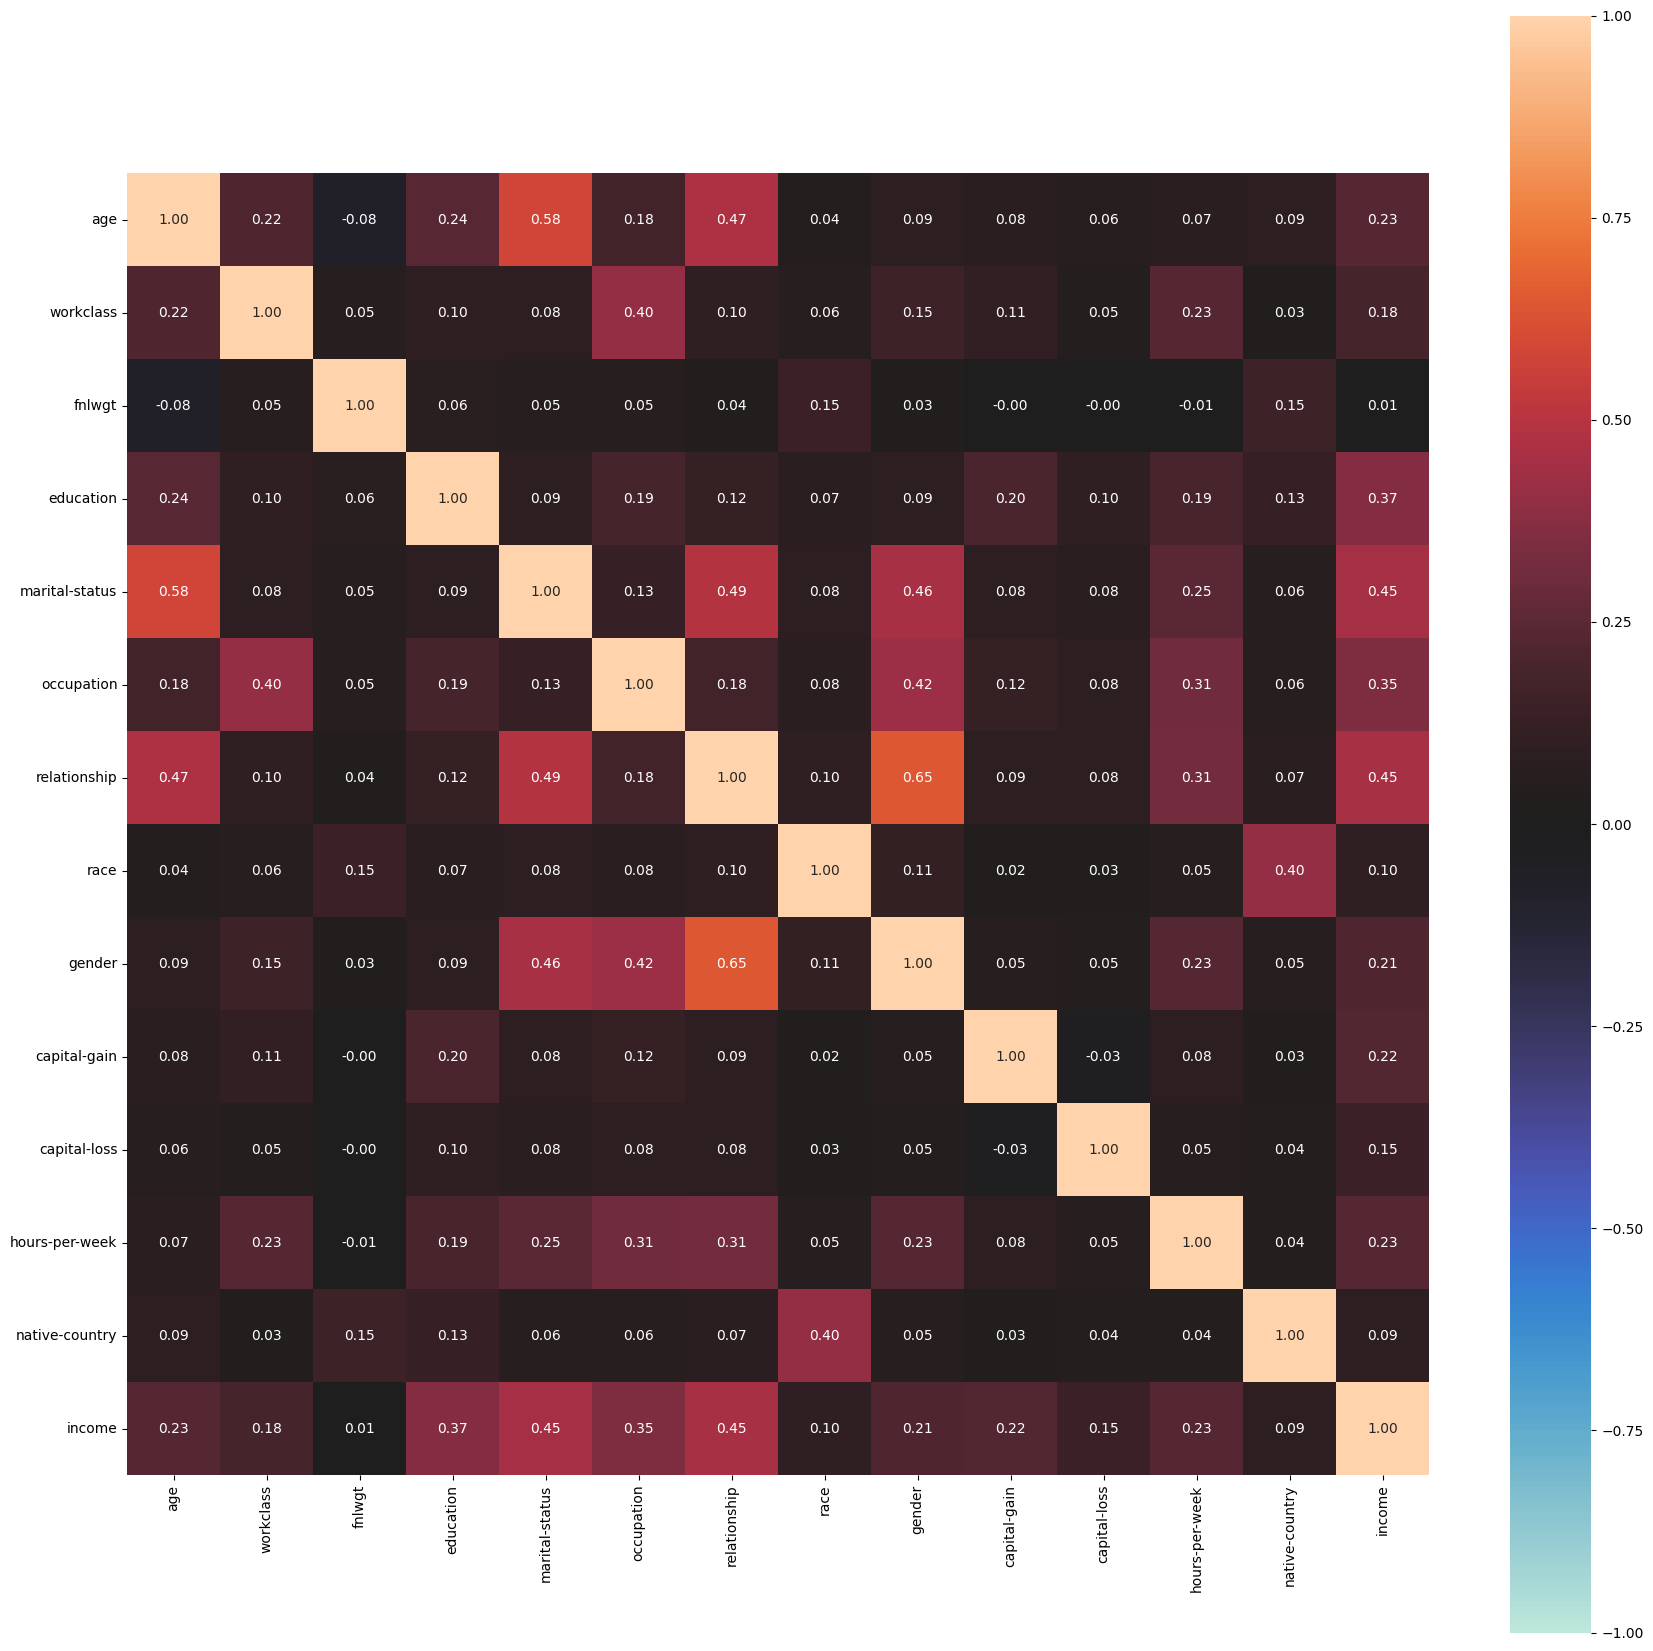

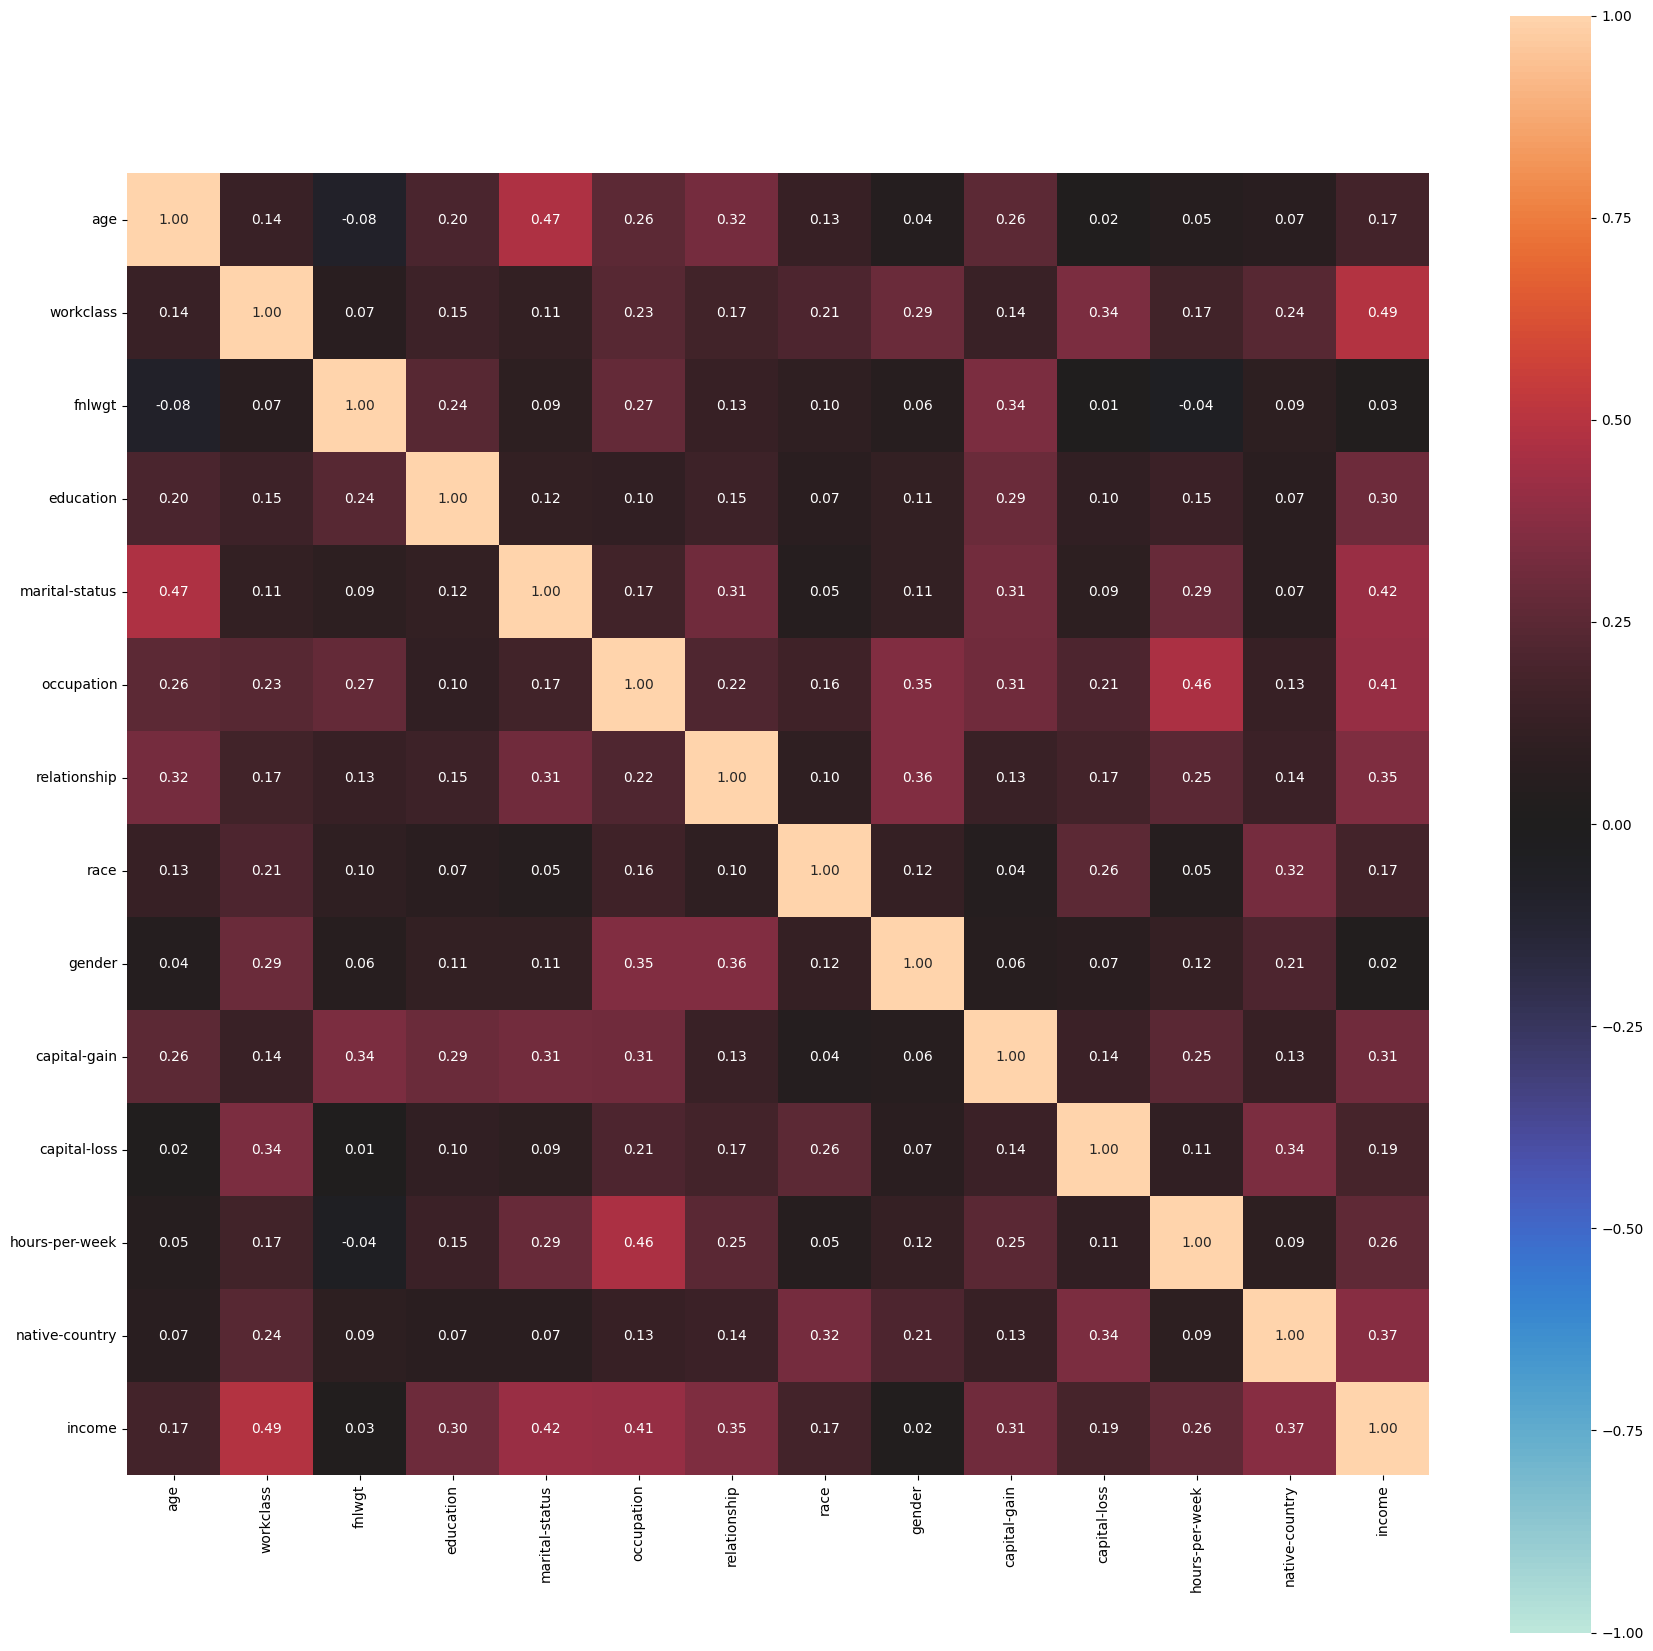

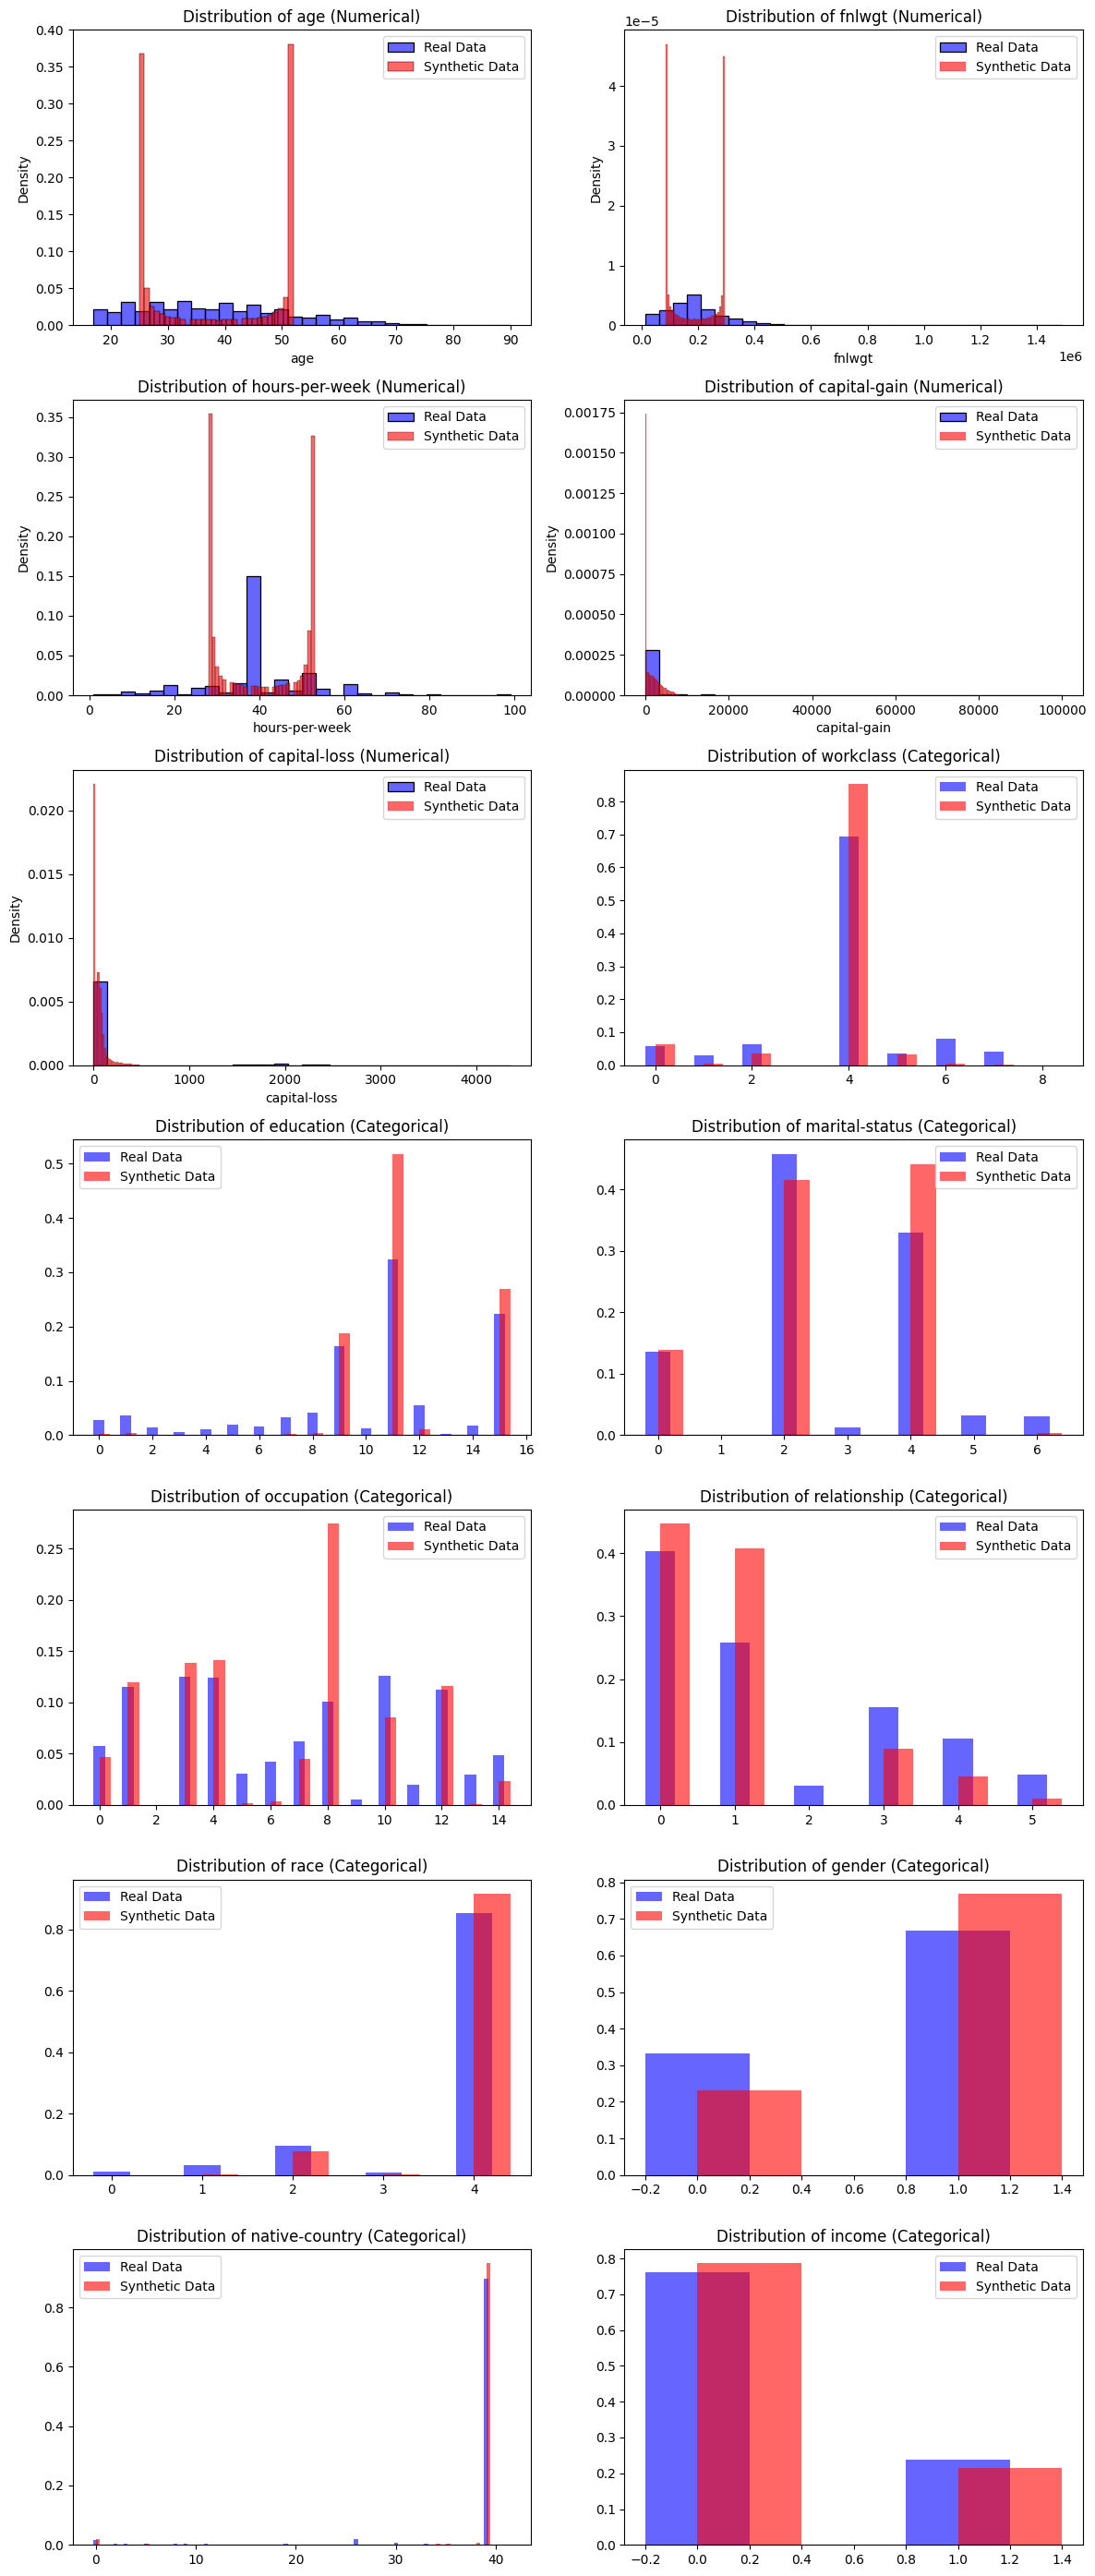

In [13]:
# 1. Evaluate Utility
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)
print(drift_results)

# 5. Visualize Distributions
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)


# Interpretation:


### 🔍 **Utility Metrics Comparison (Real vs. Synthetic)**

Across all classifiers (Logistic Regression, Decision Tree, Random Forest, and Multilayer Perceptron), **models trained on real data significantly outperformed those trained on synthetic data** in terms of:
- **Accuracy** (differences range from ~5 to 13 points)
- **AUC** (differences range from ~0.14 to 0.20)
- **F1 Score** (differences range from ~0.16 to 0.22)

👉 The **Random Forest** and **MLP** classifiers showed the **largest drops in performance** when switching to synthetic data, particularly in AUC and F1 Score—indicating a **loss in predictive quality**.

---

### 📊 **Statistical Similarity Metrics**

- **Wasserstein Distance (0.0452)**: Indicates **moderate similarity** between real and synthetic data for continuous features.
- **Jensen-Shannon Divergence (0.1601)**: Suggests **noticeable differences** in the distribution of categorical variables.
- **Correlation Distance (1.7080)**: A relatively **high value**, implying that **correlation structures were not well preserved** in the synthetic data.

---

### 🔒 **Privacy Metrics**

- **Distance to Closest Record (DCR)**:
  - Real vs. Synthetic: **0.8955 (High)** → Good for privacy, synthetic data points are not too similar to any real records.
  - Real-Real: **0.2165**, Synthetic-Synthetic: **0.0995** → Expected to be lower.
  
- **Nearest Neighbor Distance Ratio (NNDR)**:
  - Real vs. Synthetic: **0.7777 (High)** → Also indicates **strong privacy preservation**.
  - Within-dataset values (Real: 0.4421, Synthetic: 0.3419) are lower as expected.

✅ **Interpretation**: The synthetic data maintains **strong privacy protection** but at a **cost to utility and realism**.

---

### ⚠️ **Data Drift Detection**

- **Drift Detected** in most features, including key demographics like **age**, **education**, **workclass**, and **occupation**.
- **No Drift Detected** for **gender** and **income**.
  
📌 **Conclusion**: The **synthetic data deviates substantially** from real data in terms of feature distributions, especially for numeric variables (all show drift via K-S tests).

---

### 📚 **Overall Takeaway**

- **Utility**: Significantly reduced in synthetic data; performance drops across all models.
- **Similarity**: Statistical structure and distribution of features are **noticeably different**.
- **Privacy**: Synthetic data does well in preserving privacy, showing **low risk of data leakage**.
- **Recommendation**: Current synthetic data may be **more suited for exploratory analysis or privacy-preserving sharing** rather than high-performance modeling tasks.


## Join Us

Join us in exploring how Indox can revolutionize your document processing workflow, bringing clarity and organization to your data retrieval needs. Connect with us and become part of our growing community through the platforms below:

## Community

- [Discord](https://discord.com/invite/xGz5tQYaeq)
- [X (Twitter)](https://x.com/osllmai)
- [LinkedIn](https://www.linkedin.com/company/osllmai/)
- [YouTube](https://www.youtube.com/@osllm-rb9pr)
- [Telegram](https://t.me/osllmai)


*Reviewed by: Ali Nemati - March, 22, 2025*